# Imports and Device

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import pickle

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


# Loading Data

In [3]:
z_dim = 2
data_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('./data',
               transform=torchvision.transforms.ToTensor(),
               download=True),
        batch_size=128,
        shuffle=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16915692.83it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 461054.80it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4228581.40it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9398386.17it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Ploting Functions

In [4]:
def plot_latent_with_eval(autoencoder, data):
    autoencoder.eval()
    datapoints = []
    ypoints = []
    for i, (x, y) in enumerate(data):
        z = autoencoder.encoder(x.to(device))
        z = z.to('cpu').detach().numpy()
        # plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
        datapoints.append(z)
        ypoints.append(y)

    # Concatenate all data points into a single array
    datapoints = np.concatenate(datapoints, axis=0)
    ypoints = np.concatenate(ypoints, axis=0)
    #silhouette_avg = silhouette_score(datapoints, ypoints)
    #print("Silhouette Score:", silhouette_avg)
    davies_bouldin = davies_bouldin_score(datapoints, ypoints)
    print("Davies-Bouldin Index:", davies_bouldin)
    # here are different possibilities to plot the data with different classifiers performences and seperation borders
    #svm_classifier = SVC(kernel='rbf')
    #svm_classifier.fit(datapoints, ypoints)
    #y_pred = svm_classifier.predict(datapoints)
    #accuracy = accuracy_score(ypoints, y_pred)
    #print("SVM Accuracy:", accuracy)
    # lr_classifier = LogisticRegression(multi_class='ovr')
    # lr_classifier.fit(datapoints, ypoints)
    # y_pred = lr_classifier.predict(datapoints)
    # accuracy = accuracy_score(ypoints, y_pred)
    # print("Logistic Regression Accuracy:", accuracy)
    # rf_classifier = RandomForestClassifier()
    # rf_classifier.fit(datapoints, ypoints)
    # y_pred = rf_classifier.predict(datapoints)
    # accuracy = accuracy_score(ypoints, y_pred)
    # print("Random Forest Accuracy:", accuracy)
    # knn_classifier = KNeighborsClassifier(n_neighbors=10)
    # knn_classifier.fit(z, y)
    # knn_accuracy = accuracy_score(ypoints, knn_classifier.predict(datapoints))
    # print(f"accuracy: {knn_accuracy}")
    #plot_decision_regions(datapoints, ypoints, clf=svm_classifier, legend=2)
    #plt.colorbar()
def plot_latent_with_eval_c(autoencoder, data):
    autoencoder.eval()
    datapoints = []
    ypoints = []
    for i, (x, y) in enumerate(data):
        z, y_pred = autoencoder.encoder(x.to(device))
        z = z.to('cpu').detach().numpy()
        # plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
        datapoints.append(z)
        ypoints.append(y)

    # Concatenate all data points into a single array
    datapoints = np.concatenate(datapoints, axis=0)
    ypoints = np.concatenate(ypoints, axis=0)
    #silhouette_avg = silhouette_score(datapoints, ypoints)
    #print("Silhouette Score:", silhouette_avg)
    davies_bouldin = davies_bouldin_score(datapoints, ypoints)
    print("Davies-Bouldin Index:", davies_bouldin)
    # here are different possibilities to plot the data with different classifiers performences and seperation borders
    #svm_classifier = SVC(kernel='rbf')
    #svm_classifier.fit(datapoints, ypoints)
    #y_pred = svm_classifier.predict(datapoints)
    #accuracy = accuracy_score(ypoints, y_pred)
    #print("SVM Accuracy:", accuracy)
    # lr_classifier = LogisticRegression(multi_class='ovr')
    # lr_classifier.fit(datapoints, ypoints)
    # y_pred = lr_classifier.predict(datapoints)
    # accuracy = accuracy_score(ypoints, y_pred)
    # print("Logistic Regression Accuracy:", accuracy)
    # rf_classifier = RandomForestClassifier()
    # rf_classifier.fit(datapoints, ypoints)
    # y_pred = rf_classifier.predict(datapoints)
    # accuracy = accuracy_score(ypoints, y_pred)
    # print("Random Forest Accuracy:", accuracy)
    # knn_classifier = KNeighborsClassifier(n_neighbors=10)
    # knn_classifier.fit(z, y)
    # knn_accuracy = accuracy_score(ypoints, knn_classifier.predict(datapoints))
    # print(f"accuracy: {knn_accuracy}")
    #plot_decision_regions(datapoints, ypoints, clf=svm_classifier, legend=2)
    #plt.colorbar()
def plot_latent(autoencoder, data):
    autoencoder.eval()
    for i, (x, y) in enumerate(data):
        z = autoencoder.encoder(x.to(device))
        z = z.to('cpu').detach().numpy()
        plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
    plt.colorbar()
def plot_latent_c(autoencoder, data):
    autoencoder.eval()
    for i, (x, y) in enumerate(data):
        z, y_pred = autoencoder.encoder(x.to(device))
        z = z.to('cpu').detach().numpy()
        plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
    plt.colorbar()
def plot_reconstructed(autoencoder,  r0=(-5, 10), r1=(-10, 5), n=12):
    autoencoder.eval()
    w = 28
    img = []
    for i, z2 in enumerate(np.linspace(r1[1],r1[0], n)):
        for j, z1 in enumerate(np.linspace(*r0, n)):
            z = torch.Tensor([[z1, z2]]).to(device)
            x_hat = autoencoder.decoder(z)
            img.append(x_hat)

    img = torch.cat(img)
    img = torchvision.utils.make_grid(img,nrow=12).permute(1, 2, 0).to('cpu').detach().numpy()
    plt.imshow(img,extent=[*r0, *r1])
def plot_loss_log(arr, title, xtitle, ytitle):
  plt.figure(figsize=(9,5))
  plt.plot(arr)
  plt.yscale('log')  # Set the y-axis to a logarithmic scale
  plt.title(title)
  plt.xlabel(xtitle)
  plt.ylabel(ytitle)
  plt.show()
def plot_loss(arr, title, xtitle, ytitle):
  plt.figure(figsize=(9,5))
  plt.plot(arr)
  plt.title(title)
  plt.xlabel(xtitle)
  plt.ylabel(ytitle)
  plt.show()
def plot_reconstructed_and_save_fake_data(autoencoder,  r0=(-5, 10), r1=(-10, 5), n=12):
    autoencoder.eval()
    w = 28
    img = []
    for i, z2 in enumerate(np.linspace(r1[1],r1[0], n)):
        for j, z1 in enumerate(np.linspace(*r0, n)):
            z = torch.Tensor([[z1, z2]]).to(device)
            x_hat = autoencoder.decoder(z)
            # sigma = 0.1
            # x_hat += torch.randn_like(x_hat) * sigma ## noise option 2 - during decoder reconstruction
            img.append(x_hat)
    img = torch.cat(img)
    filename = f"decoded_({r0[0]},{r0[1]}),({r1[0]},{r1[1]})_{n}"
    torch.save(img, filename)

    img = torch.load(filename)
    img = torchvision.utils.make_grid(img,nrow=n).permute(1, 2, 0).to('cpu').detach().numpy()
    plt.figure(figsize=(12, 12))
    plt.imshow(img,extent=[*r0, *r1])

# Descriminator Architecture

In [5]:
class Descriminator(nn.Module):
    def __init__(self, input_channels):
        super(Descriminator, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.dropout = nn.Dropout(0.2)
        # Pooling layers to reduce dimensions
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flat = nn.Flatten()
        self.fc_single_neuron = nn.Linear(128, 1)
        self.batch_norm = nn.BatchNorm1d(1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forwardsingle(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool2(x)
        x = x.view(x.size()[0], -1)
        x = self.dropout(x)
        x = torch.transpose(x, 0, 1)
        x = self.fc_single_neuron(x)
        x = self.sigmoid(x)
        return x

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool2(x)
        x = x.view(x.size()[0], -1)
        x = self.dropout(x)
        x = self.fc_single_neuron(x)
        x = self.sigmoid(x)
        return x

# Classifier Architecture

In [6]:
class VAEClassifier(nn.Module):
    def __init__(self):
        super(VAEClassifier, self).__init__()
        self.fc1 = nn.Linear(2, 15)  # Input layer (2 features to 64 neurons)
        self.fc2 = nn.Linear(15, 15) # Hidden layer (64 to 32 neurons)
        self.fc3 = nn.Linear(15, 10) # Output layer (32 neurons to 10 classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No softmax here because CrossEntropyLoss applies softmax internally
        return x


#Encoder Architecture

In [7]:
class Encoder(nn.Module):
    def __init__(self, input_channels, latent_dim):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.dropout = nn.Dropout(0.2)
        self.fc_mu_logvar = nn.Linear(128 * 4 * 4, 2*latent_dim)
        self.relu = nn.ReLU()

    def reparametrization_trick(self, mu, log_var):
        eps = torch.randn_like(log_var)
        return mu + torch.exp(log_var / 2) * eps

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = x.view(x.size()[0], -1)
        x = self.dropout(x)
        mu, log_var = torch.split(self.fc_mu_logvar(x),2, dim=-1)
        self.kl = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        return self.reparametrization_trick(mu, log_var)

# Decoder Architecture

In [8]:
#my decoder
class Decoder(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder, self).__init__()
        self.kernel_num1 = 128
        self.kernel_num2 = 64
        self.kernel_num3 = 32
        self.linear1 = nn.Linear(latent_dims, 128*4*4)
        self.deconv1 = nn.ConvTranspose2d(self.kernel_num1, self.kernel_num2,  kernel_size=3, stride=2, padding=1)
        self.deconv2 = nn.ConvTranspose2d(self.kernel_num2, self.kernel_num3,  kernel_size=4, stride=2, padding=1)
        self.deconv3 = nn.ConvTranspose2d(self.kernel_num3, 1,  kernel_size=4, stride=2, padding=1)
        self.relu = nn.ReLU()
        self.final = nn.Sigmoid()
    def forward(self, z):
        z = self.linear1(z)
        z = self.relu(z)
        z = z.view(-1, self.kernel_num1, 4, 4)
        z = self.deconv1(z)
        z = self.relu(z)
        z = self.deconv2(z)
        z = self.relu(z)
        z = self.deconv3(z)
        z = self.final(z)
        return z.reshape((-1, 1, 28, 28))

# VAE architecture

In [9]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dims):
        super().__init__()
        self.encoder = Encoder(1, latent_dims)
        self.decoder = Decoder(latent_dims)

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [10]:
class VariationalAutoencoderWithClassifier(nn.Module):
    def __init__(self, latent_dims):
        super().__init__()
        self.encoder = Encoder(1, latent_dims)
        self.decoder = Decoder(latent_dims)
        self.classifier = VAEClassifier()

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z), self.classifier(z)

# Training Descriminator

In [ ]:
def train_discriminator(discriminator, fake_data, mnist_samples, epochs=20):
    bce_loss = torch.nn.BCELoss()
    opt = torch.optim.Adam(discriminator.parameters(), lr=0.0001)
    data_size = fake_data.shape[0]
    losses = []

    for epoch in range(epochs):
        total_loss_sum = 0
        for f,m in zip(fake_data,mnist_samples):
            opt.zero_grad()
            # Forward pass through the discriminator
            pred_fake = discriminator.forwardsingle(f.to(device))  # Move data to GPU
            pred_real = discriminator.forwardsingle(m.to(device))  # Move data to GPU
            # Compute BCE loss
            real_labels = torch.zeros_like(pred_real).to(device)
            fake_labels = torch.ones_like(pred_fake).to(device)
            loss = bce_loss(pred_fake, fake_labels) + bce_loss(pred_real, real_labels)
            # Backward pass and optimization
            loss.backward()
            opt.step()
            # Accumulate total loss
            total_loss_sum += loss.item()


        losses.append(total_loss_sum / data_size)
        print(f"Epoch {epoch + 1}: Total Loss = {total_loss_sum / data_size}")
    return discriminator, losses


In [ ]:
fake_data = torch.load("fake_data.zip", map_location=torch.device('cpu'))
# Set up data loader

mnist_samples = []
for batch_idx, (data, target) in enumerate(data_loader):
    mnist_samples.extend(data)  # Add batch of images to the list
    if len(mnist_samples) >= 900:  # Stop when we reach 900 samples
        mnist_samples = mnist_samples[:900]  # Trim the list if needed
        break

mnist_samples = torch.stack(mnist_samples).to(device)  # Shape: (900, 1, 28, 28)

Epoch 1: Total Loss = 0.42212751338517085
Epoch 2: Total Loss = 0.021227155561177317
Epoch 3: Total Loss = 0.009521898825922916
Epoch 4: Total Loss = 0.0052133399564465634
Epoch 5: Total Loss = 0.0033434669085414094
Epoch 6: Total Loss = 0.002237717026120865
Epoch 7: Total Loss = 0.00132755038931868
Epoch 8: Total Loss = 0.0007813831653685257
Epoch 9: Total Loss = 0.001216261658991837
Epoch 10: Total Loss = 0.004085448217072856
Epoch 11: Total Loss = 0.0027461255635097357
Epoch 12: Total Loss = 0.0006160859336402306
Epoch 13: Total Loss = 0.0005679753372754388
Epoch 14: Total Loss = 0.0009736124146232012
Epoch 15: Total Loss = 0.0004399585882277199
Epoch 16: Total Loss = 6.157090115204748e-05
Epoch 17: Total Loss = 6.478593474421409e-05
Epoch 18: Total Loss = 9.641275793313891e-05
Epoch 19: Total Loss = 2.778357280048746e-05
Epoch 20: Total Loss = 0.0011027612627162902


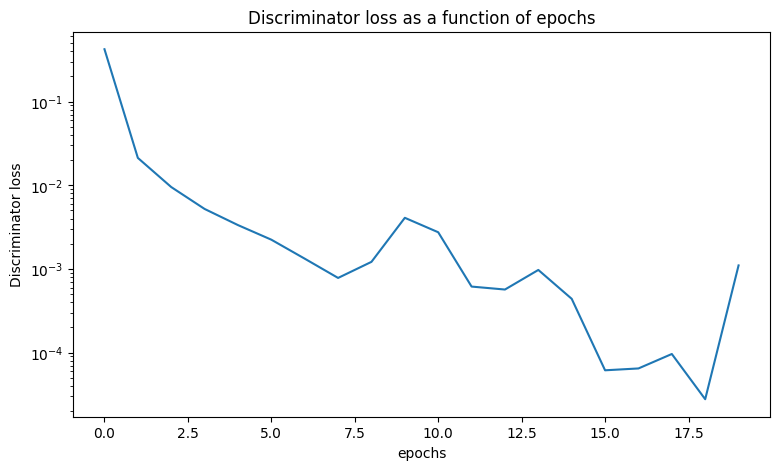

In [ ]:
discriminator = Descriminator(1).to(device)
discriminator, losses = train_discriminator(discriminator, fake_data, mnist_samples)
plot_loss(losses, "Discriminator loss as a function of epochs", "epochs", "Discriminator loss")

In [ ]:
torch.save(discriminator.state_dict(), 'Dis1.pkl')

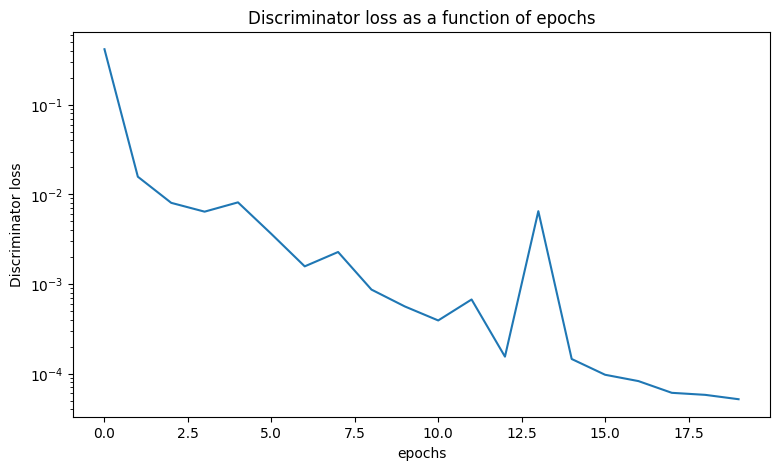

In [ ]:
plot_loss(losses, "Discriminator loss as a function of epochs", "epochs", "Discriminator loss")

# Training Encoder Decoder

In [ ]:
def train(vae, data, epochs=30):
  kl_divergence = []
  reconstruction_loss = []
  opt = torch.optim.Adam(vae.parameters(), lr = 0.001)
  data_size = len(data.dataset)
  for epoch in range(epochs):
    total_loss_sum = 0
    kl_sum = 0
    reconstruction_sum = 0
    i = 0
    for x, y in data:
      i = i+1
      batch_size = x.size()[0]
      x = x.to(device) # GPU
      opt.zero_grad()
      x_hat = vae(x)
      loss = F.binary_cross_entropy(x_hat, x, reduction='sum') + vae.encoder.kl
      kl_sum = kl_sum + vae.encoder.kl.item()
      reconstruction_sum = reconstruction_sum + F.binary_cross_entropy(x_hat, x, reduction='sum').item()*batch_size
      loss.backward()
      opt.step()
      total_loss_sum = total_loss_sum + loss.item()*batch_size
      if not(i+1)%100:
        print(loss.item())
    kl_divergence.append(kl_sum/data_size)
    reconstruction_loss.append(reconstruction_sum/data_size)
    print(f"the total loss of epoch: {epoch+1} is: {total_loss_sum/data_size}")
  return vae, kl_divergence, reconstruction_loss

In [ ]:
vae = VariationalAutoencoder(z_dim).to(device) # GPU
vae, kl_divergence, reconstruction_loss = train(vae, data_loader, epochs=60)

# Training Together

In [ ]:

def train_together(vae, discriminator, data, epochs=20, discriminator_weight=100, depochs = 1):  # best 30 epochs with 200
  print(f'epochs: {epochs}, dw: {discriminator_weight}')
  kl_divergence = []
  reconstruction_loss = []
  losses_from_dis = []
  discriminator_loss = [0]
  # Optimizers for both VAE and Discriminator
  optgenerator = torch.optim.Adam(vae.parameters(), lr=0.001)  #0.001 best
  optdiscriminator = torch.optim.Adam(discriminator.parameters(), lr=0.001)
  # Loss function
  bce_loss = torch.nn.BCELoss()
  data_size = len(data.dataset)

  for epoch in range(epochs):
      total_loss_sum = 0
      kl_sum = 0
      reconstruction_sum = 0
      loss_from_discriminator_sum = 0
      i = 0

      for x, y in data:
          i += 1
          batch_size = x.size(0)
          x = x.to(device)  # GPU
          # Zero out gradients
          optgenerator.zero_grad()
          optdiscriminator.zero_grad()
          # VAE forward pass
          x_hat = vae(x)
          # Discriminator forward pass
          discriminator_outcome_hat = discriminator(x_hat.detach())  # Detach to prevent gradients flowing into VAE
          discriminator_outcome_hat_for_vae = discriminator(x_hat)
          discriminator_outcome = discriminator(x)
          # Discriminator loss
          discriminator_loss_sum = (
              bce_loss(discriminator_outcome_hat, torch.ones_like(discriminator_outcome_hat)) +
              bce_loss(discriminator_outcome, torch.zeros_like(discriminator_outcome))
          )

          # VAE loss, including the discriminator component
          kl_sum += vae.encoder.kl.item()
          loss_from_discriminator = bce_loss(discriminator_outcome_hat_for_vae, torch.zeros_like(discriminator_outcome_hat_for_vae))
          vae_loss = F.binary_cross_entropy(x_hat, x, reduction='sum') + vae.encoder.kl + discriminator_weight * loss_from_discriminator

          # Reconstruction loss for monitoring
          reconstruction_sum += F.binary_cross_entropy(x_hat, x, reduction='sum').item() * batch_size

          # Backpropagation for the VAE
          if (epoch > depochs) and ((epoch-depochs-1) % 3 ==0) or (epoch>30):
              vae_loss.backward()  # Only updates VAE parameters
              optgenerator.step()

          # Backpropagation for the Discriminator
          if epoch < 30:
              discriminator_loss_sum.backward()  # Only updates Discriminator parameters
              optdiscriminator.step()

          # Accumulate total loss
          total_loss_sum += vae_loss.item() * batch_size
          loss_from_discriminator_sum += loss_from_discriminator.item() * discriminator_weight
          discriminator_loss[-1] += discriminator_loss_sum.item() * batch_size

          if (i + 1) % 100 == 0:
              print(f"Batch {i + 1}: VAE Loss = {vae_loss.item()}, Discriminator Loss = {discriminator_loss_sum.item()}, Loss from Discriminator = {loss_from_discriminator.item()*discriminator_weight}")

      # Log losses for the epoch
      kl_divergence.append(kl_sum / data_size)
      reconstruction_loss.append(reconstruction_sum / data_size)
      discriminator_loss[-1] = discriminator_loss[-1] / data_size
      discriminator_loss.append(0)  # Prepare for the next epoch
      losses_from_dis.append(loss_from_discriminator_sum / data_size)
      print(f"Epoch {epoch + 1}: Total Loss = {total_loss_sum / data_size}, Discriminator Loss = {discriminator_loss[-2]}")

  return vae, discriminator, kl_divergence, reconstruction_loss, discriminator_loss[:-1], losses_from_dis

In [ ]:
model_name1 = VariationalAutoencoder
loaded_vae = model_name1(z_dim).to(device) #creating the model object
state_dict1 = torch.load('vae_orig.pkl', map_location=torch.device('cpu'))  #loading weights onto the model
loaded_vae.load_state_dict(state_dict1)
model_name2 = Descriminator
loaded_dis = model_name2(1).to(device) #creating the model object
state_dict2 = torch.load('disTog2.pkl', map_location=torch.device('cpu'))  #loading weights onto the model
loaded_dis.load_state_dict(state_dict2)
vae, discriminator, kl_divergence, reconstruction_loss, discriminator_loss, losses_from_dis = train_together(loaded_vae, loaded_dis, data_loader, epochs=20)

In [ ]:
discriminator = Descriminator(1).to(device)
vae = VariationalAutoencoder(z_dim).to(device) # GPU
vae, discriminator, kl_divergence, reconstruction_loss, discriminator_loss, losses_from_dis = train_together(vae, discriminator, data_loader, epochs=40, discriminator_weight=15, depochs = 3)

epochs: 40, dw: 15
Batch 100: VAE Loss = 62083.6640625, Discriminator Loss = 1.2030483048874885e-05, Loss from Discriminator = 181.62938117980957
Batch 200: VAE Loss = 62086.1484375, Discriminator Loss = 8.70034364197636e-06, Loss from Discriminator = 186.20481491088867
Batch 300: VAE Loss = 62115.62890625, Discriminator Loss = 8.366764632228296e-06, Loss from Discriminator = 190.68391799926758
Batch 400: VAE Loss = 62013.859375, Discriminator Loss = 5.137958396517206e-06, Loss from Discriminator = 194.4894790649414
Epoch 1: Total Loss = 62045.311625, Discriminator Loss = 0.029530433657452036
Batch 100: VAE Loss = 62033.53515625, Discriminator Loss = 3.5265602491563186e-06, Loss from Discriminator = 199.00732040405273
Batch 200: VAE Loss = 62228.390625, Discriminator Loss = 2.963725137306028e-06, Loss from Discriminator = 204.20682907104492
Batch 300: VAE Loss = 61985.83984375, Discriminator Loss = 2.725070771703031e-06, Loss from Discriminator = 206.03047370910645
Batch 400: VAE Loss 

In [ ]:
plot_loss(reconstruction_loss, "reconstruction", "epochs", "reconstruction")
plot_loss(discriminator_loss, "dis", "epochs", "dis")
plot_loss(losses_from_dis, "from d", "epochs", "from d")

In [ ]:
torch.save(discriminator.state_dict(), 'disTog15d4e40best.pkl')
torch.save(vae.state_dict(), 'vaeTog15d4e40best.pkl')

# Training with Classifier

In [11]:
def train_together_classifier(vaec, discriminator, data, epochs=40, discriminator_weight=10, depochs = 3, cw = 1000, klboost = 80):
  print(f'epochs: {epochs}, dw: {discriminator_weight}')
  kl_divergence = []
  reconstruction_loss = []
  losses_from_dis = []
  discriminator_loss = [0]
  # Optimizers for both VAE and Discriminator
  optgenerator = torch.optim.Adam(vaec.parameters(), lr=0.001)  #0.001 best
  optdiscriminator = torch.optim.Adam(discriminator.parameters(), lr=0.001)
  # Loss function
  bce_loss = torch.nn.BCELoss() # for discriminator
  data_size = len(data.dataset)
  criterion = nn.CrossEntropyLoss() # for classifier
  klw = 1
  for epoch in range(epochs):
      total_loss_sum = 0
      kl_sum = 0
      reconstruction_sum = 0
      loss_from_discriminator_sum = 0
      i = 0
      if (epoch == klboost):
          klw = 10
      for x, y in data:
          i += 1
          batch_size = x.size(0)
          x = x.to(device)  # GPU
          y = y.to(device)  # GPU
          # Zero out gradients
          optgenerator.zero_grad()
          optdiscriminator.zero_grad()
          # VAE forward pass
          x_hat, classifier_preds = vaec(x)
          # Discriminator forward pass
          discriminator_outcome_hat = discriminator(x_hat.detach())  # Detach to prevent gradients flowing into VAE
          discriminator_outcome_hat_for_vae = discriminator(x_hat)
          discriminator_outcome = discriminator(x)
          # Discriminator loss
          discriminator_loss_sum = (
              bce_loss(discriminator_outcome_hat, torch.ones_like(discriminator_outcome_hat)) +
              bce_loss(discriminator_outcome, torch.zeros_like(discriminator_outcome))
          )

          # VAE loss, including the discriminator component
          kl_sum += vaec.encoder.kl.item()
          classifier_loss = criterion(classifier_preds, y)
          loss_from_discriminator = bce_loss(discriminator_outcome_hat_for_vae, torch.zeros_like(discriminator_outcome_hat_for_vae))
          vae_loss = F.binary_cross_entropy(x_hat, x, reduction='sum') + klw*vaec.encoder.kl + discriminator_weight * loss_from_discriminator + classifier_loss * cw

          # Reconstruction loss for monitoring
          reconstruction_sum += F.binary_cross_entropy(x_hat, x, reduction='sum').item() * batch_size

          # Backpropagation for the VAE
          if (epoch > depochs) and ((epoch-depochs-1) % 3 ==0) or (epoch>30):
              vae_loss.backward()  # Only updates VAE parameters
              optgenerator.step()

          # Backpropagation for the Discriminator
          if epoch < 30:
              discriminator_loss_sum.backward()  # Only updates Discriminator parameters
              optdiscriminator.step()

          # Accumulate total loss
          total_loss_sum += vae_loss.item() * batch_size
          loss_from_discriminator_sum += loss_from_discriminator.item() * discriminator_weight
          discriminator_loss[-1] += discriminator_loss_sum.item() * batch_size

          if (i + 1) % 100 == 0:
              print(f"Batch {i + 1}: VAE Loss = {vae_loss.item()}, Discriminator Loss = {discriminator_loss_sum.item()}, Loss from Discriminator = {loss_from_discriminator.item()*discriminator_weight}")

      # Log losses for the epoch
      kl_divergence.append(kl_sum / data_size)
      reconstruction_loss.append(reconstruction_sum / data_size)
      discriminator_loss[-1] = discriminator_loss[-1] / data_size
      discriminator_loss.append(0)  # Prepare for the next epoch
      losses_from_dis.append(loss_from_discriminator_sum / data_size)
      print(f"Epoch {epoch + 1}: Total Loss = {total_loss_sum / data_size}, Discriminator Loss = {discriminator_loss[-2]}")

  return vaec, discriminator, kl_divergence, reconstruction_loss, discriminator_loss[:-1], losses_from_dis

In [12]:
discriminator = Descriminator(1).to(device)
vaec = VariationalAutoencoderWithClassifier(z_dim).to(device) # GPU
vaec, discriminator, kl_divergence, reconstruction_loss, discriminator_loss, losses_from_dis = train_together_classifier(vaec, discriminator, data_loader, epochs=40, discriminator_weight=10, depochs = 3, klboost = 30)

epochs: 40, dw: 10
Batch 100: VAE Loss = 71914.3203125, Discriminator Loss = 9.604110346117523e-06, Loss from Discriminator = 123.54799270629883
Batch 200: VAE Loss = 71897.0859375, Discriminator Loss = 1.8685761460801587e-05, Loss from Discriminator = 128.57736587524414
Batch 300: VAE Loss = 71885.8359375, Discriminator Loss = 6.405946351151215e-06, Loss from Discriminator = 128.7434196472168
Batch 400: VAE Loss = 71893.4609375, Discriminator Loss = 3.308063014628715e-06, Loss from Discriminator = 131.7713737487793
Epoch 1: Total Loss = 71890.76091875, Discriminator Loss = 0.027523545121576416
Batch 100: VAE Loss = 71952.7734375, Discriminator Loss = 1.6765648069849703e-06, Loss from Discriminator = 147.09768295288086
Batch 200: VAE Loss = 71975.8046875, Discriminator Loss = 1.7347904304187978e-06, Loss from Discriminator = 149.6418857574463
Batch 300: VAE Loss = 71955.5390625, Discriminator Loss = 2.132706185875577e-06, Loss from Discriminator = 168.01467895507812
Batch 400: VAE Loss

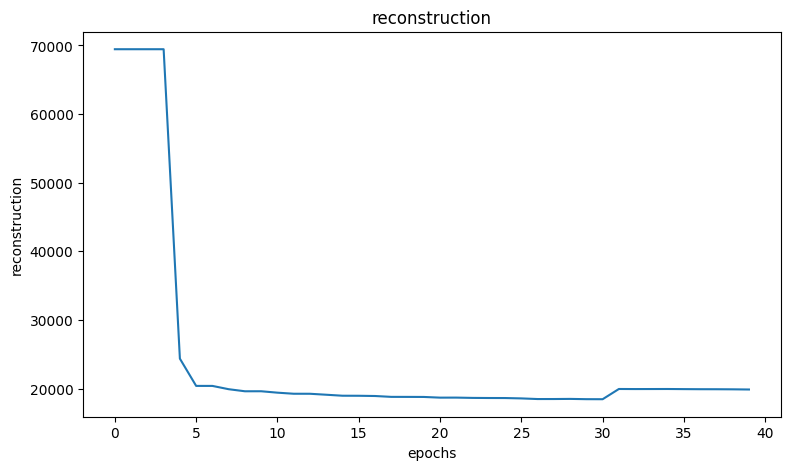

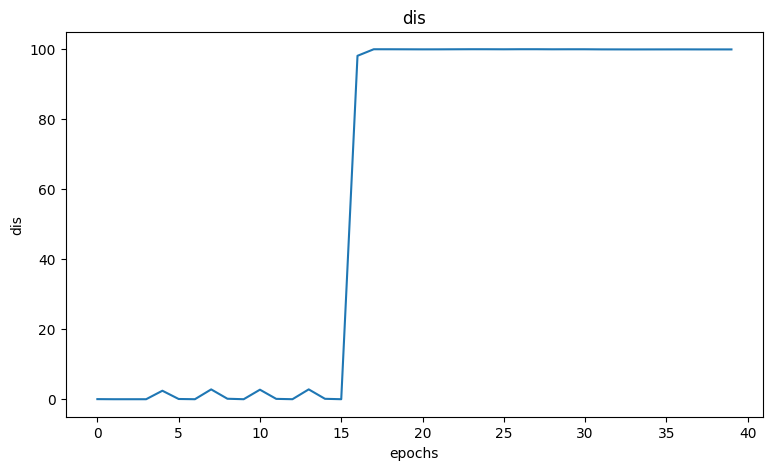

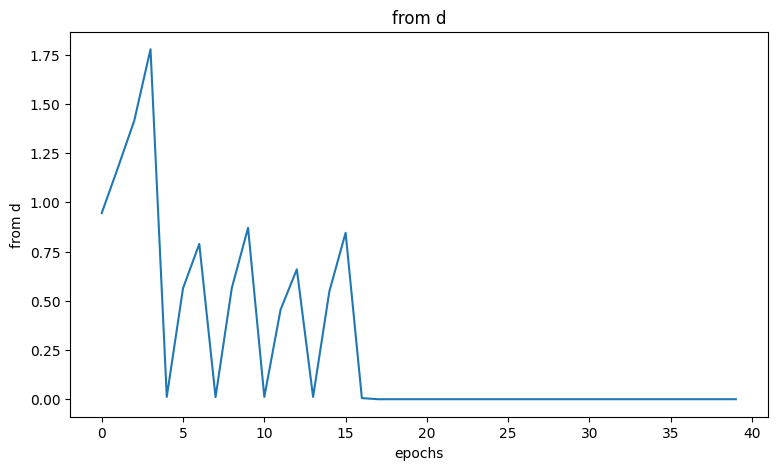

In [13]:
plot_loss(reconstruction_loss, "reconstruction", "epochs", "reconstruction")
plot_loss(discriminator_loss, "dis", "epochs", "dis")
plot_loss(losses_from_dis, "from d", "epochs", "from d")
torch.save(discriminator.state_dict(), 'disTog15d4e40cb1.pkl')
torch.save(vaec.state_dict(), 'vaeTog15d4e40cb1.pkl')

# Latent space and decoding

Davies-Bouldin Index: 2.909619446991535


VariationalAutoencoderWithClassifier(
  (encoder): Encoder(
    (conv1): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (dropout): Dropout(p=0.2, inplace=False)
    (fc_mu_logvar): Linear(in_features=2048, out_features=4, bias=True)
    (relu): ReLU()
  )
  (decoder): Decoder(
    (linear1): Linear(in_features=2, out_features=2048, bias=True)
    (deconv1): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (deconv2): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (deconv3): ConvTranspose2d(32, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (relu): ReLU()
    (final): Sigmoid()
  )
  (classifier): VAEClassifier(
    (fc1): Linear(in_features=2, out_features=15, bias=True)
    (fc2): Linear(in_features=15, out_features=15, bias=True)
    

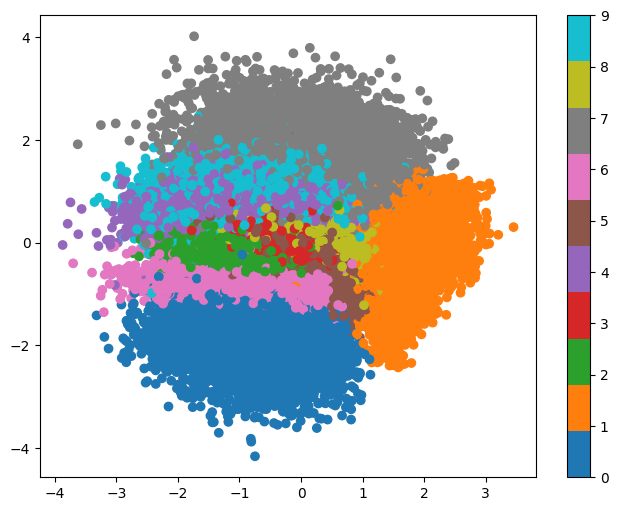

<Figure size 800x600 with 0 Axes>

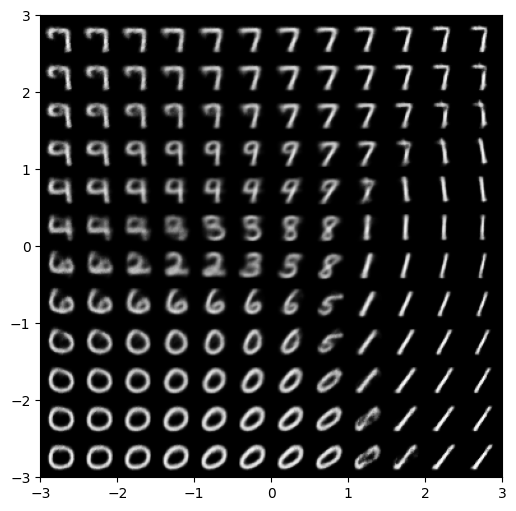

In [14]:
def vaeloadandplot():
    z_dim = 2
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model_name = VariationalAutoencoderWithClassifier
    loaded_vae = model_name(z_dim).to(device) #creating the model object
    state_dict = torch.load('vaeTog15d4e40cb1.pkl', map_location=torch.device('cpu'))  #loading weights onto the model
    loaded_vae.load_state_dict(state_dict)

    plt.figure(figsize=(8, 6))  # Create a new figure for the latent space plot
    plot_latent(loaded_vae, data_loader)
    plt.figure(figsize=(8, 6))  # Create a new figure for the reconstructed images plot
    plot_latent_with_eval(loaded_vae, data_loader)
    loaded_vae.eval()
    plt.figure(figsize=(8, 6))  # Create a new figure for the reconstructed images plot
    plot_reconstructed(loaded_vae, r0=(-3, 3), r1=(-3, 3))
    return loaded_vae
vaeloadandplot()

Davies-Bouldin Index: 3.282661170592496


VariationalAutoencoder(
  (encoder): Encoder(
    (conv1): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (dropout): Dropout(p=0.2, inplace=False)
    (fc_mu_logvar): Linear(in_features=2048, out_features=4, bias=True)
    (relu): ReLU()
  )
  (decoder): Decoder(
    (linear1): Linear(in_features=2, out_features=2048, bias=True)
    (deconv1): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (deconv2): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (deconv3): ConvTranspose2d(32, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (relu): ReLU()
    (final): Sigmoid()
  )
)

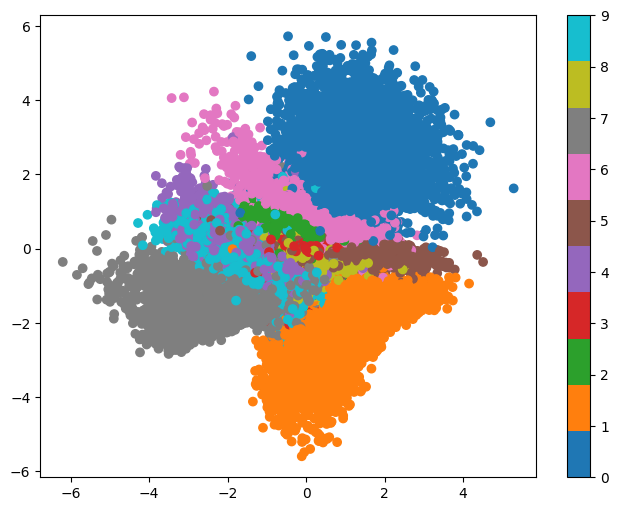

<Figure size 800x600 with 0 Axes>

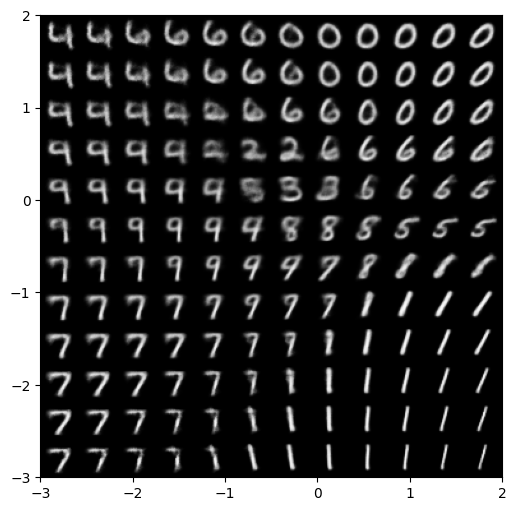

In [ ]:
def vaeloadandplot():
    z_dim = 2
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model_name = VariationalAutoencoder
    loaded_vae = model_name(z_dim).to(device) #creating the model object
    state_dict = torch.load('vaeTog15d4e40.pkl', map_location=torch.device('cpu'))  #loading weights onto the model
    loaded_vae.load_state_dict(state_dict)

    plt.figure(figsize=(8, 6))  # Create a new figure for the latent space plot
    plot_latent(loaded_vae, data_loader)
    plt.figure(figsize=(8, 6))  # Create a new figure for the reconstructed images plot
    plot_latent_with_eval(loaded_vae, data_loader)
    loaded_vae.eval()
    plt.figure(figsize=(8, 6))  # Create a new figure for the reconstructed images plot
    plot_reconstructed(loaded_vae, r0=(-3, 2), r1=(-3, 2))
    return loaded_vae
vaeloadandplot()

Silhouette Score: 0.041944697
Davies-Bouldin Index: 3.761667614013052


VariationalAutoencoder(
  (encoder): Encoder(
    (conv1): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (dropout): Dropout(p=0.2, inplace=False)
    (fc_mu_logvar): Linear(in_features=2048, out_features=4, bias=True)
    (relu): ReLU()
  )
  (decoder): Decoder(
    (linear1): Linear(in_features=2, out_features=2048, bias=True)
    (deconv1): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (deconv2): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (deconv3): ConvTranspose2d(32, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (relu): ReLU()
    (final): Sigmoid()
  )
)

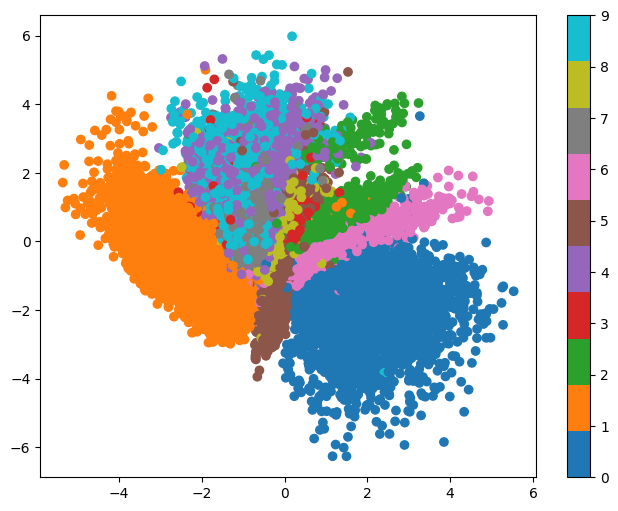

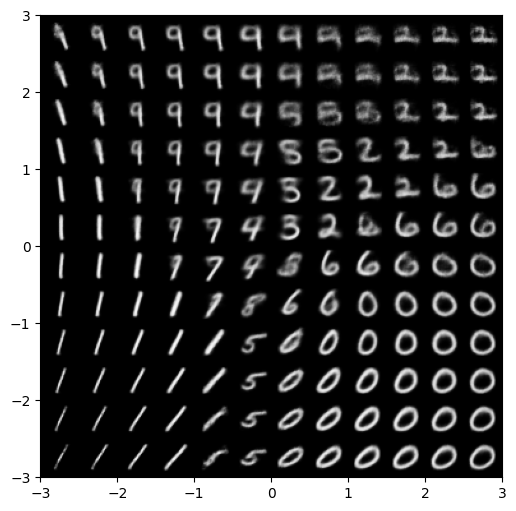

In [ ]:
def vaeloadandplot():
    z_dim = 2
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model_name = VariationalAutoencoder
    loaded_vae = model_name(z_dim).to(device) #creating the model object
    state_dict = torch.load('vae_orig.pkl', map_location=torch.device('cpu'))  #loading weights onto the model
    loaded_vae.load_state_dict(state_dict)

    plt.figure(figsize=(8, 6))  # Create a new figure for the latent space plot
    plot_latent(loaded_vae, data_loader)
    #plt.figure(figsize=(8, 6))  # Create a new figure for the reconstructed images plot
    plot_latent_with_eval(loaded_vae, data_loader)
    loaded_vae.eval()
    plt.figure(figsize=(8, 6))  # Create a new figure for the reconstructed images plot
    plot_reconstructed(loaded_vae, r0=(-3, 3), r1=(-3, 3))
    return loaded_vae
vaeloadandplot()